Shape: (10000, 26)

Column Types:
 SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
Device Model                             object
Operating System                         object
App Usage Time (min/day)                  int64
Screen On Time (hours/day)              float64
Battery Drain (mAh/day)                   int64
Number of Apps Installed                  int64
Data Usage (MB/day)                       int64
Age                                       int64
Gender                                   object
User 

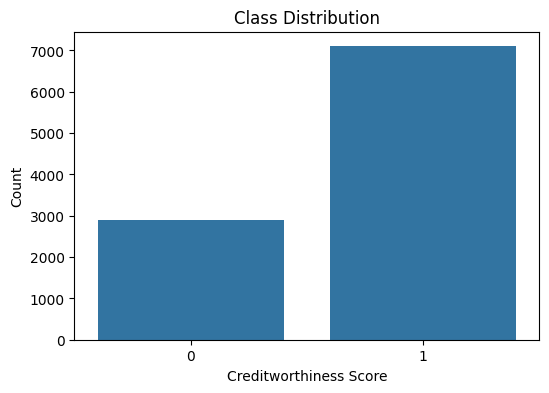


Summary Statistics:

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines          age  \
count      10000.000000                          10000.000000  10000.00000   
mean           0.065400                              7.117125     52.28890   
std            0.247243                            271.283717     14.73085   
min            0.000000                              0.000000      0.00000   
25%            0.000000                              0.030418     41.00000   
50%            0.000000                              0.160685     52.00000   
75%            0.000000                              0.566368     62.25000   
max            1.000000                          22000.000000    101.00000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                          10000.000000   10000.000000    8005.000000   
mean                               0.433300     350.641706    6754.215116   
std                                4.414669 

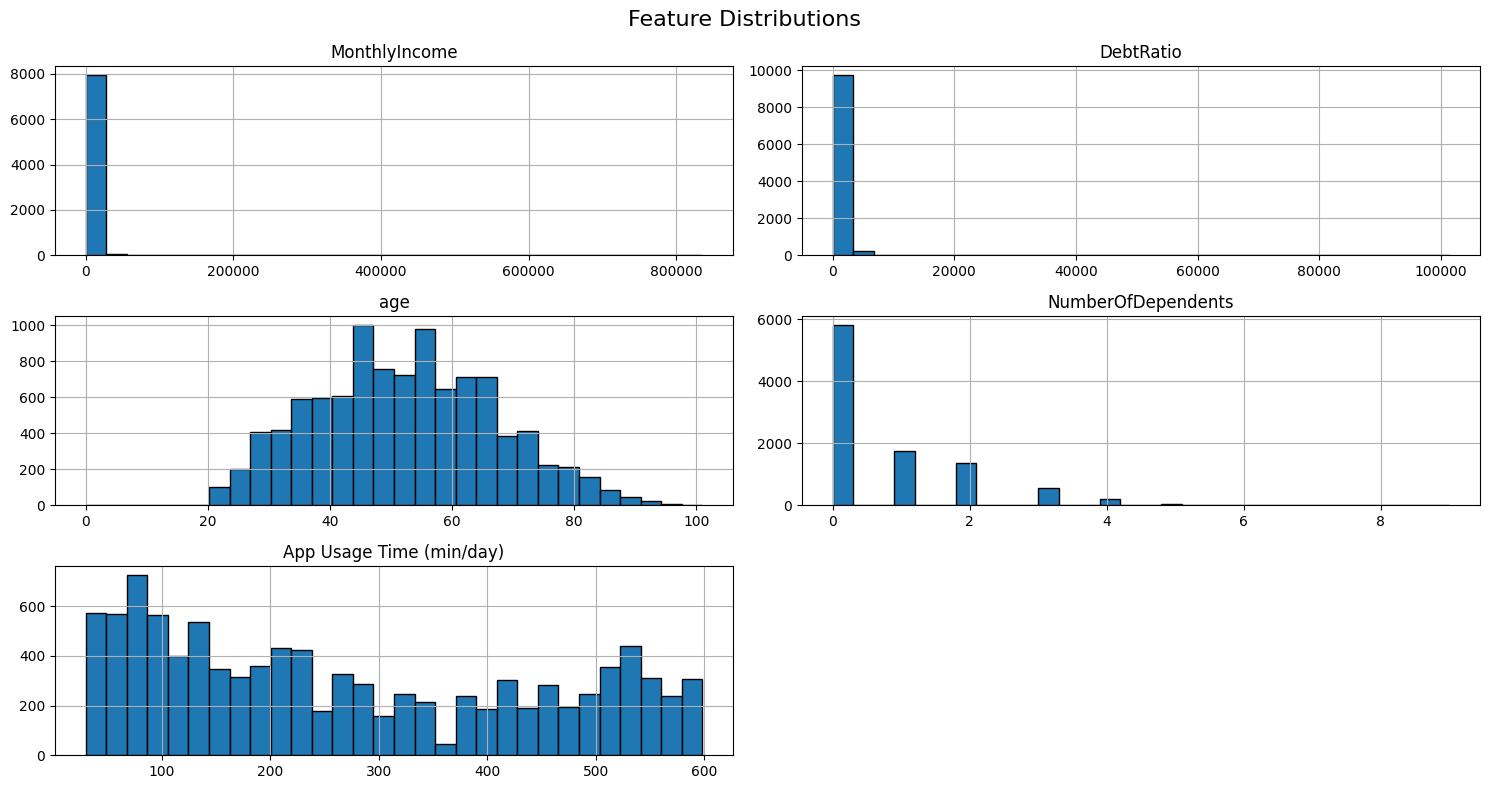

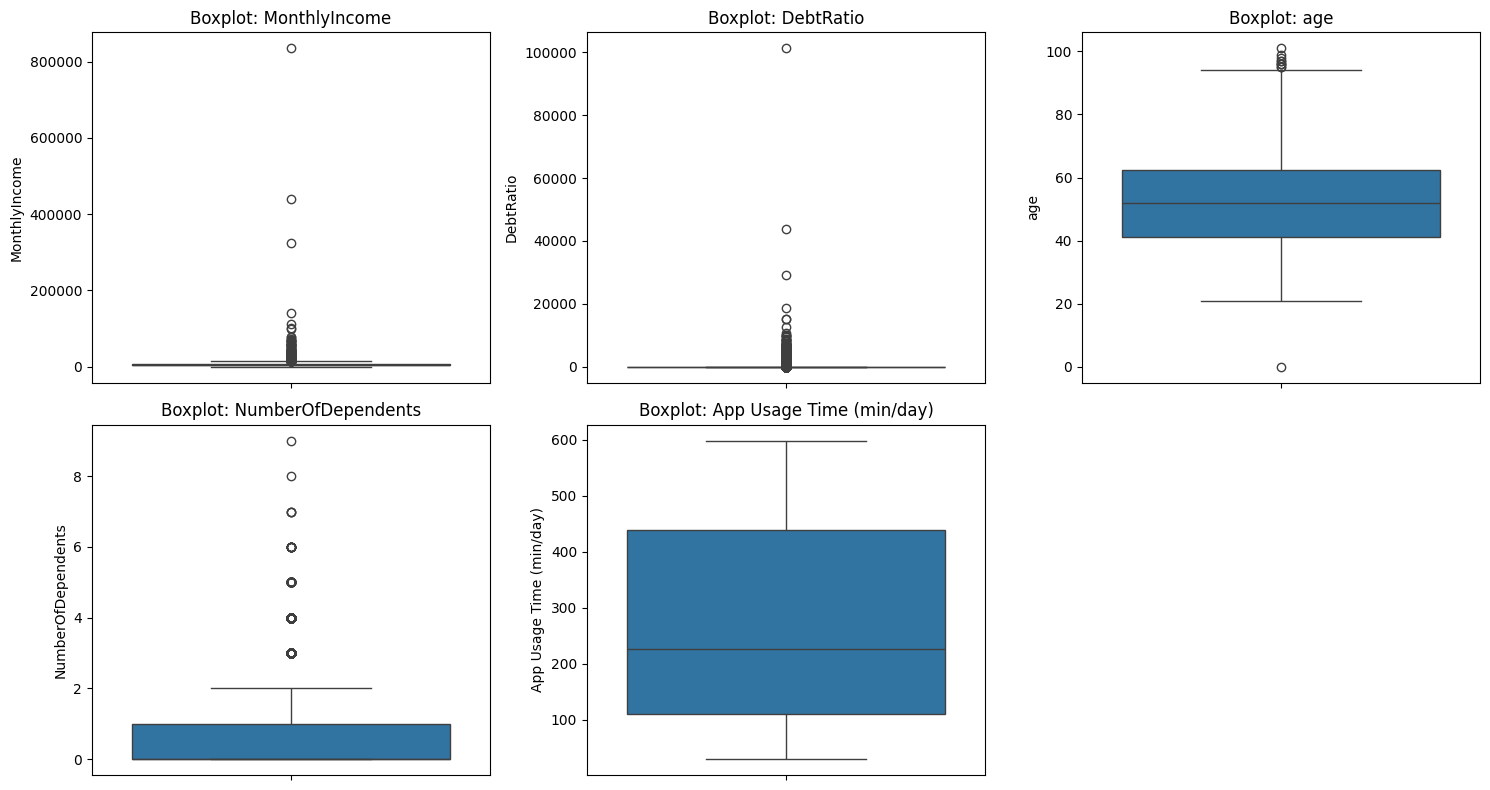

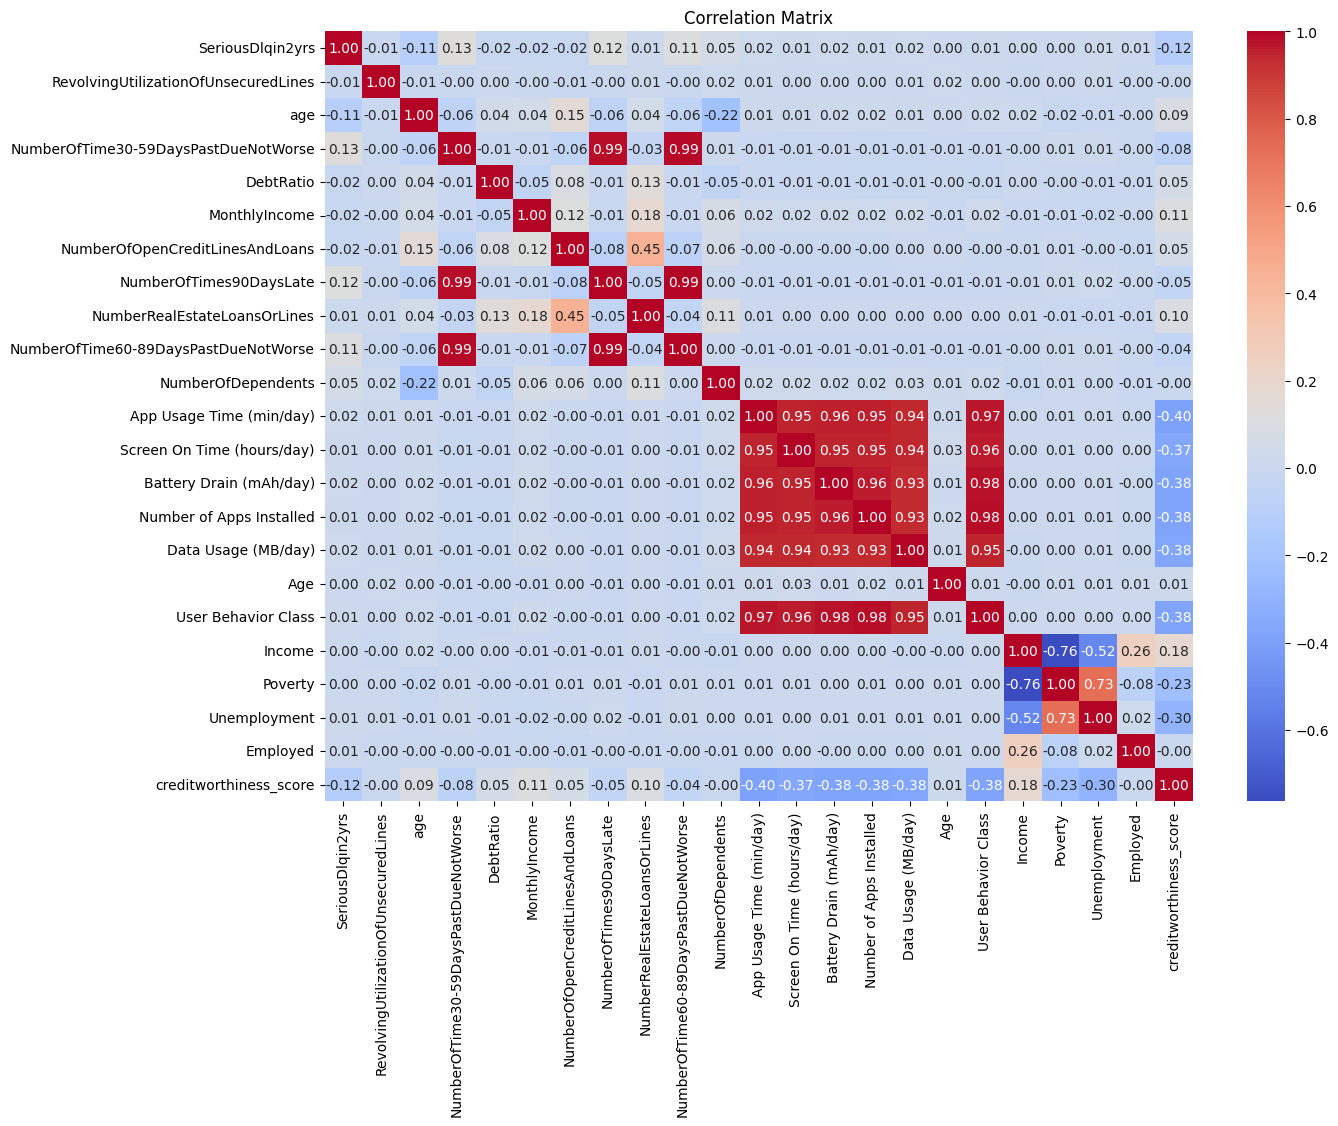

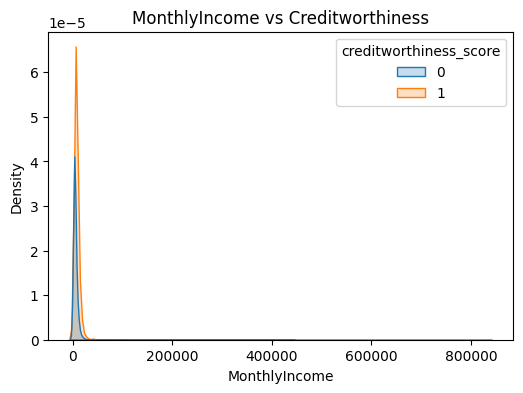

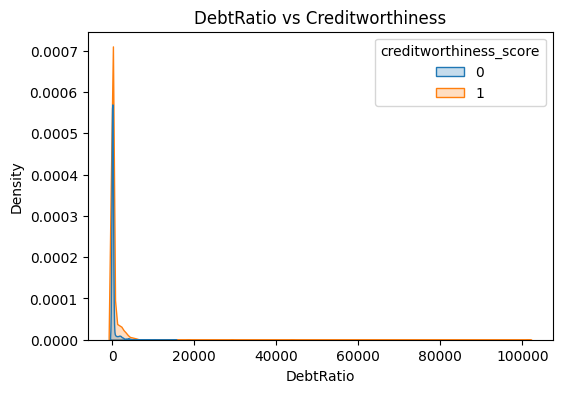

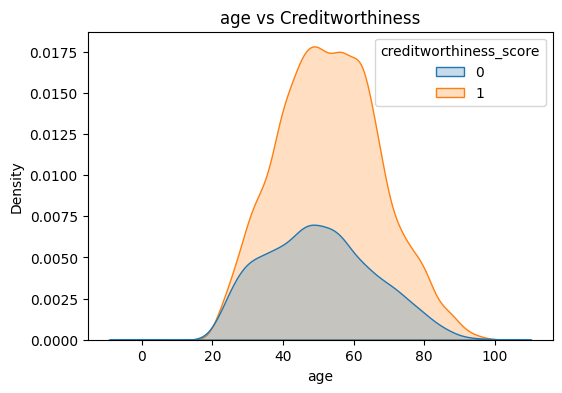

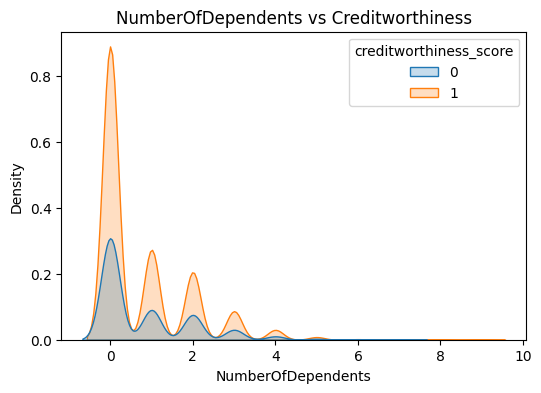

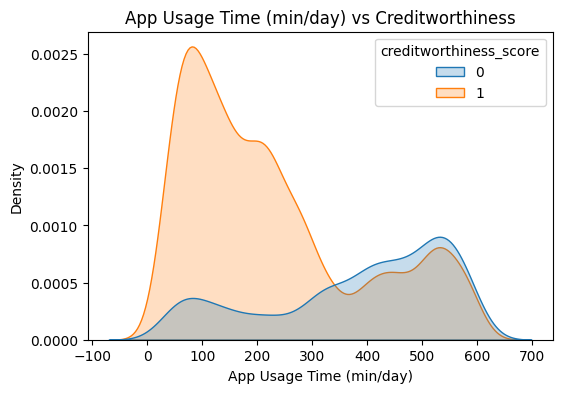

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("Nova_credit_simulated_dataset_10000.csv")
df = df.drop(columns=['Unnamed: 0', 'User ID'], errors='ignore')

# === 1. Dataset Overview ===
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# === 2. Convert Non-Numeric Columns to Numeric (if needed) ===
# Drop non-numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])

# === 3. Class Imbalance Visualization ===
plt.figure(figsize=(6, 4))
sns.countplot(x='creditworthiness_score', data=df)
plt.title("Class Distribution")
plt.xlabel("Creditworthiness Score")
plt.ylabel("Count")
plt.show()

# === 4. Numerical Summary ===
print("\nSummary Statistics:\n")
print(df_numeric.describe())

# === 5. Feature Distribution Plots ===
top_features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfDependents', 'App Usage Time (min/day)']
df_numeric[top_features].hist(bins=30, figsize=(15, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# === 6. Outlier Detection via Boxplots ===
plt.figure(figsize=(15, 8))
for i, col in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_numeric[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# === 7. Correlation Matrix (Fixed) ===
plt.figure(figsize=(14, 10))
corr = df_numeric.corr()  # Use only numeric data
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# === 8. KDE plots ===
for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_numeric, x=col, hue="creditworthiness_score", fill=True)
    plt.title(f"{col} vs Creditworthiness")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


## Exploratory Data Analysis (EDA) – CreditDekho Dataset

### 1. Dataset Overview
- **Rows**: 10,000
- **Columns**: 26 features including demographic, behavioral, and financial variables
- **Target Variable**: `creditworthiness_score`
  - `1` = Creditworthy (71%)
  - `0` = Not Creditworthy (29%) → Minority class
- **Missing values**:
  - `MonthlyIncome`: ~20% missing
  - `NumberOfDependents`: ~2.4%
  - `Income`: 1 missing row
  - **Recommendation**: Use **median imputation** as it is more robust to outliers

---

### 2. Class Imbalance
- The dataset is imbalanced:
  - Class 1 (creditworthy): approximately 71%
  - Class 0 (not creditworthy): approximately 29%
- This imbalance must be addressed during modeling using:
  - SMOTE (Synthetic Minority Over-sampling Technique)
  - Undersampling
  - Class weighting
- Evaluation should include metrics such as:
  - Precision, Recall, and F1-score, especially for class 0 (minority class)
  - ROC AUC for overall model discrimination

---

### 3. Feature Distributions
- `MonthlyIncome` and `DebtRatio` are heavily **right-skewed** with extreme outliers (e.g., income > 800,000; debt ratio > 100,000)
- `Age` shows a bell-shaped distribution centered around age 50
- `NumberOfDependents` is highly skewed toward 0–2
- `App Usage Time` displays bimodal distribution, suggesting behavioral segmentation in users

---

### 4. Outlier Detection
Boxplots indicate the presence of significant outliers in:
- `MonthlyIncome`
- `DebtRatio`
- `NumberOfDependents`
- These outliers could affect model performance and scale-sensitive methods
- **Recommendation**: Try both versions of the dataset (with and without outliers), and consider using IQR filtering or quantile-based clipping

---

### 5. Correlation Analysis
- Strong multicollinearity is observed:
  - `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, and `NumberOfTimes90DaysLate` are extremely correlated (correlation > 0.97)
  - App usage features such as `App Usage Time`, `Screen On Time`, `Battery Drain`, and `Data Usage` are also highly intercorrelated
- **Recommendation**:
  - Consider dimensionality reduction (PCA, feature aggregation)
  - Merge or drop redundant features to prevent multicollinearity issues

---

### 6. Feature vs Target Insights (KDE Plots)
- **MonthlyIncome**: Slight tendency for higher income among creditworthy individuals
- **DebtRatio**: Lower values are associated with higher creditworthiness
- **Age**: Older individuals are more likely to be creditworthy
- **NumberOfDependents**: Class 1 has slightly higher dependents on average
- **App Usage Time**: Higher variance in class 0; moderate app users (100–300 mins/day) are more creditworthy

---

### Summary of EDA Insights

| Aspect              | Insight                                                                 |
|---------------------|-------------------------------------------------------------------------|
| Class Distribution  | Imbalanced (71% vs 29%) – focus on recall/precision for class 0         |
| Missing Values      | Primarily in `MonthlyIncome` – impute using median                      |
| Outliers            | Present in income and debt ratio – consider filtering or capping        |
| Feature Redundancy  | App behavior and delinquency variables are highly correlated            |
| Feature Separation  | Age and Debt Ratio show strongest separation with creditworthiness      |

---

### Next Steps
- Preprocess the dataset with:
  - Median imputation
  - Outlier removal using IQR or quantile clipping
  - Class balancing via SMOTE or undersampling

- Begin modeling using both raw and feature-engineered versions of the data

- Create new features such as:
  - `TotalDelinquencies = sum([30-59, 60-89, 90+])`
  - `AppUsagePerApp = App Usage Time / Number of Apps Installed`
  - `IncomeToDebtRatio = MonthlyIncome / (DebtRatio + 1e-6)`


In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("Nova_credit_simulated_dataset_10000.csv")

# Drop unnecessary identifier columns if they exist
df = df.drop(columns=[col for col in ['Unnamed: 0', 'User ID'] if col in df.columns], errors='ignore')

# ========== 1. Combine Delinquency Features ==========
df['TotalDelinquencies'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate']
)

# ========== 2. Ratio Features ==========
# Prevent division by zero or missing values
df['IncomeToDebtRatio'] = df['MonthlyIncome'] / (df['DebtRatio'] + 1e-6)
df['AppUsagePerApp'] = df['App Usage Time (min/day)'] / (df['Number of Apps Installed'] + 1)

# ========== 3. Drop Redundant or Highly Correlated Columns ==========
redundant_cols = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]
df.drop(columns=redundant_cols, inplace=True)

# ========== 4. Impute Missing Values with Median ==========
df = df.fillna(df.median(numeric_only=True))

# ========== 5. One-Hot Encode Categorical Variables ==========
categorical_cols = ['Device Model', 'Operating System', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ========== 6. Rename for reuse ==========
df_fe = df.copy()  # Optional alias for clarity in pipeline use

# ========== 7. Preview Feature-Engineered Data ==========
print("Shape after feature engineering:", df.shape)
print(df.head())


Shape after feature engineering: (10000, 29)
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age    DebtRatio  \
0                 0                              0.029690   57     0.283244   
1                 0                              0.000000   57     0.142562   
2                 0                              0.036569   48     0.236294   
3                 0                              1.018331   41     0.163138   
4                 0                              1.008799   49  3942.000000   

   MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
0        10121.0                                7   
1         7750.0                                9   
2         6000.0                                6   
3         4958.0                                4   
4         5439.0                               10   

   NumberRealEstateLoansOrLines  NumberOfDependents  App Usage Time (min/day)  \
0                             1                 0.0                       174   

## Feature Engineering Analysis

### Overview

After applying feature engineering, the dataset now contains **29 columns** (including the target variable `creditworthiness_score`). These include the original variables, engineered ratios, aggregations, and one-hot encoded categorical features.

---

### Key Feature Engineering Steps Applied

1. **Delinquency Aggregation**  
   - Combined three separate variables:
     - `NumberOfTime30-59DaysPastDueNotWorse`
     - `NumberOfTime60-89DaysPastDueNotWorse`
     - `NumberOfTimes90DaysLate`  
   - Created a single composite feature:
     - `TotalDelinquencies`  
   - **Why**: These three features were highly correlated and represent similar behavior. Combining them simplifies the model and reduces multicollinearity.

2. **Ratio-Based Features**
   - `IncomeToDebtRatio`: Computed as `MonthlyIncome / DebtRatio`
     - Captures financial health more intuitively than raw values
   - `AppUsagePerApp`: Computed as `App Usage Time (min/day) / Number of Apps Installed`
     - Reflects intensity of digital engagement
   - **Why**: Ratio features often provide better signal and normalize behavior across individuals.

3. **One-Hot Encoding**
   - Applied to the following categorical variables:
     - `Device Model`
     - `Operating System`
     - `Gender`
   - **Why**: Many machine learning models require numeric inputs. Encoding avoids ordinal bias in categorical interpretation.

4. **Missing Value Handling**
   - All missing values in numeric features were imputed using the **median**.
   - **Why**: Median is robust to outliers and skewed distributions, especially in `MonthlyIncome` and `NumberOfDependents`.

---

### Sample Output

- Dataset Shape: **(10,000, 29)**
- Example of new features:
  - `TotalDelinquencies`: 0 for most users in sample output (indicating reliable history)
  - `IncomeToDebtRatio`: ranges from ~21K to ~54K in first 5 rows
  - `AppUsagePerApp`: ranges from ~3.9 to ~5.4, indicating moderately engaged users

---

### Benefits of Feature Engineering

| Category         | Value Added                                                       |
|------------------|--------------------------------------------------------------------|
| Simpler Inputs   | Reduced multicollinearity through aggregation                     |
| Better Signals   | Created derived metrics (ratios) that better reflect behavior      |
| Model Readiness  | One-hot encoded data, filled missing values, and removed ambiguity |
| Interpretability | Easier to explain ratios and combined metrics to stakeholders      |



In [25]:
# Outlier functions
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

def replace_outliers_with_mean(df, cols):
    df_copy = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mean_val = df[col].mean()
        df_copy.loc[df_copy[col] < lower, col] = mean_val
        df_copy.loc[df_copy[col] > upper, col] = mean_val
    return df_copy

# Columns to treat
outlier_cols = ['MonthlyIncome', 'DebtRatio', 'NumberOfDependents', 'App Usage Time (min/day)',
                'IncomeToDebtRatio', 'AppUsagePerApp']

# Usage
df_fe_removed = remove_outliers_iqr(df_fe, outlier_cols)
df_fe_replaced = replace_outliers_with_mean(df_fe, outlier_cols)


<ipython-input-25-2bfc74ad5754>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '270.6614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] < lower, col] = mean_val


## Step 3: Preprocessing Version Setup

To build a robust credit scoring model, we are comparing multiple versions of our dataset under different preprocessing conditions. This includes:

- Raw vs Feature Engineered datasets
- Outlier handling using:
  - No outlier treatment
  - Outlier row removal (IQR method)
  - Outlier replacement with mean
- Missing value imputation using both mean and median
- Class imbalance handling using:
  - No resampling
  - SMOTE
  - Undersampling
  - SMOTEENN

Each version will be fed into a modeling pipeline for 7 ML models to find the best combination.

We’ve created two base data versions:
- `df_raw`: Original dataset
- `df_fe`: Feature engineered version

We then apply outlier handling to produce:
- `df_fe_removed`: With outliers removed
- `df_fe_replaced`: With outliers replaced by mean


## Updated Preprocessing Comparison Grid (with Scaling)

| Version | Feature Eng | Outlier | Impute | Imbalance | Scaling     | Notes                         |
|---------|-------------|---------|--------|-----------|-------------|-------------------------------|
| V1      | No          | None    | Mean   | None      | None        | Raw baseline                  |
| V2      | No          | Removed | Median | SMOTE     | MinMax      | Cleaned raw + balanced        |
| V3      | No          | Replaced| Median | Under     | Standard    | Raw with outlier treatment    |
| V4      | Yes         | None    | Median | None      | MinMax      | Feature engineered            |
| V5      | Yes         | Removed | Median | SMOTE     | Standard    | Cleanest feature version      |
| V6      | Yes         | Replaced| Mean   | SMOTEENN  | MinMax      | Soft-cleaned engineered       |
| V7      | Yes         | Removed | Median | None      | None        | High-quality FE no balance    |


In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import log_loss, classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np

def preprocess_pipeline(
    df,
    outlier_strategy='none',
    impute_strategy='median',
    imbalance_strategy='none',
    scale_strategy='minmax',
    target_col='creditworthiness_score',
    test_size=0.2,
    random_state=42
):
    df_copy = df.copy()

    # Separate target
    y = df_copy[target_col]
    X = df_copy.drop(columns=[target_col])

    # === CATEGORICAL ENCODING (Early) ===
    X = pd.get_dummies(X, drop_first=True)

    # === OUTLIER HANDLING ===
    def iqr_bounds(s):
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    if outlier_strategy == 'remove':
        for col in X.select_dtypes(include='number').columns:
            lb, ub = iqr_bounds(X[col])
            mask = (X[col] >= lb) & (X[col] <= ub)
            X = X[mask]
            y = y[mask]

    elif outlier_strategy == 'replace_mean':
        for col in X.select_dtypes(include='number').columns:
            X[col] = X[col].astype(float)  # convert to float for safety
            lb, ub = iqr_bounds(X[col])
            mean_val = X[col].mean()
            X.loc[X[col] < lb, col] = mean_val
            X.loc[X[col] > ub, col] = mean_val

    # === IMPUTATION ===
    imputer = SimpleImputer(strategy=impute_strategy)
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # === SCALING ===
    if scale_strategy == 'minmax':
        scaler = MinMaxScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)
    elif scale_strategy == 'standard':
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)
    else:
        X_scaled = X_imputed.copy()

    # === SPLIT ===
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state
    )

    # === IMBALANCE HANDLING ===
    if imbalance_strategy == 'smote':
        X_train, y_train = SMOTE(random_state=random_state).fit_resample(X_train, y_train)
    elif imbalance_strategy == 'under':
        X_train, y_train = RandomUnderSampler(random_state=random_state).fit_resample(X_train, y_train)
    elif imbalance_strategy == 'smoteenn':
        X_train, y_train = SMOTEENN(random_state=random_state).fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test, X_scaled.columns.tolist()
def tune_model_logloss(model, param_dist, X_train, y_train, cv=3, n_iter=10, random_state=42):
    """
    RandomizedSearchCV to minimize log loss.
    Returns the best estimator.
    """
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring='neg_log_loss',
        n_iter=n_iter,
        cv=cv,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_


## Step 4: Modular Preprocessing Pipeline

To compare different data preparation strategies in a structured and repeatable way, we define a reusable preprocessing pipeline. This function standardizes all preprocessing tasks before model training and evaluation.

### Goals of the Pipeline:
- Apply different missing value imputation strategies: **mean** or **median**
- Handle outliers in three different ways:
  - No outlier treatment
  - Outlier **removal** using the IQR method
  - Outlier **replacement** with the column mean
- Apply consistent **scaling** of all numeric features (0–1 range using MinMaxScaler)
- Handle class imbalance using:
  - **None**
  - **SMOTE**
  - **Undersampling**
  - **SMOTEENN** (hybrid)

### Function Output:
The pipeline returns:
- `X_train`, `X_test`: Preprocessed feature sets
- `y_train`, `y_test`: Labels
- `feature_names`: Names of all columns used (important for downstream reporting)

### Why This Matters:
This approach allows us to systematically test every meaningful preprocessing combination, including:
- Raw vs Feature Engineered datasets
- Imputation type (mean vs median)
- Outlier strategy (remove, replace, none)
- Resampling strategy (none, SMOTE, under, SMOTEENN)

By modularizing preprocessing, we ensure **consistency, comparability**, and **scalability** of all future experiments across 7 machine learning models.


In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ✅ Models to tune
model_dict = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# ✅ Tuning Grids with Regularization Control
param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [4, 6, 8, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "reg_lambda": [1, 3, 5],         # L2 regularization
        "reg_alpha": [0, 1, 3]           # L1 regularization
    },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6, 8],
        "learning_rate": [0.01, 0.05, 0.1],
        "l2_leaf_reg": [1, 3, 5, 10]     # Regularization term
    },
    "LightGBM": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "min_child_samples": [20, 50],
        "subsample": [0.6, 0.8],
        "colsample_bytree": [0.6, 0.8],
        "reg_lambda": [0, 1, 3],         # L2
        "reg_alpha": [0, 1, 3]           # L1
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1.0, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"]  # needed for L1 + elastic net
    }
}

# ✅ Untuned baseline models
untuned_models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, class_weight='balanced', kernel='rbf', C=1.0)
}


In [53]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, log_loss

def train_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessing_tag, model_dict, param_grids, untuned_models=None):
    results = []
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for name, model in model_dict.items():
        print(f"\n🔍 Tuning: {name}")
        param_grid = param_grids.get(name, {})

        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            scoring="neg_log_loss",
            n_iter=10,
            cv=cv,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"✅ Best params for {name}: {search.best_params_}")

        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            "Preprocessing": preprocessing_tag,
            "Model": name,
            "LogLoss": log_loss(y_test, y_proba),
            "ROC_AUC": roc_auc_score(y_test, y_proba),
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision_0": report["0"]["precision"],
            "Recall_0": report["0"]["recall"],
            "Precision_1": report["1"]["precision"],
            "Recall_1": report["1"]["recall"],
            "F1_1": report["1"]["f1-score"]
        })

    # Evaluate untuned models if provided
    if untuned_models:
        for name, model in untuned_models.items():
            print(f"\n⚙️ Training (untuned): {name}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            report = classification_report(y_test, y_pred, output_dict=True)
            results.append({
                "Preprocessing": preprocessing_tag,
                "Model": name,
                "LogLoss": log_loss(y_test, y_proba) if y_proba is not None else None,
                "ROC_AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision_0": report["0"]["precision"],
                "Recall_0": report["0"]["recall"],
                "Precision_1": report["1"]["precision"],
                "Recall_1": report["1"]["recall"],
                "F1_1": report["1"]["f1-score"]
            })

    return pd.DataFrame(results)


## Step 5: Model Training and Evaluation

We evaluate 7 machine learning models under different preprocessing setups. Each model is trained on a train/test split and evaluated using:

- Accuracy
- Precision and Recall (especially for class 0)
- F1-score for class 1
- ROC AUC (for imbalanced classification)

All results are stored in a unified DataFrame for comparison across preprocessing strategies.


In [54]:
import pandas as pd

# Assume preprocess_pipeline, model_dict, param_grids, and train_and_evaluate_models are defined above

# Load raw dataset
df_raw = pd.read_csv("Nova_credit_simulated_dataset_10000.csv")
df_raw = df_raw.drop(columns=['Unnamed: 0', 'User ID'], errors='ignore')

# Create feature-engineered version
df_fe = df_raw.copy()
df_fe['TotalDelinquencies'] = (
    df_fe['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_fe['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_fe['NumberOfTimes90DaysLate']
)
df_fe['IncomeToDebtRatio'] = df_fe['MonthlyIncome'] / (df_fe['DebtRatio'] + 1e-6)
df_fe['AppUsagePerApp'] = df_fe['App Usage Time (min/day)'] / (df_fe['Number of Apps Installed'] + 1)
df_fe.drop(columns=[
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
], inplace=True)
df_fe = pd.get_dummies(df_fe, columns=['Device Model', 'Operating System', 'Gender'], drop_first=True)

# Configurations for raw and feature engineered
config_grid = [
    {"tag": "Raw + NoOutlier + Mean + NoBalance + NoScale", "df": "raw", "outlier": "none", "impute": "mean", "balance": "none", "scale": "none"},
    {"tag": "Raw + IQRRemove + Median + SMOTE + MinMax", "df": "raw", "outlier": "remove", "impute": "median", "balance": "smote", "scale": "minmax"},
    {"tag": "Raw + ReplaceMean + Median + Under + Standard", "df": "raw", "outlier": "replace_mean", "impute": "median", "balance": "under", "scale": "standard"},
    {"tag": "FE + NoOutlier + Median + NoBalance + MinMax", "df": "fe", "outlier": "none", "impute": "median", "balance": "none", "scale": "minmax"},
    {"tag": "FE + IQRRemove + Median + SMOTE + Standard", "df": "fe", "outlier": "remove", "impute": "median", "balance": "smote", "scale": "standard"},
    {"tag": "FE + ReplaceMean + Mean + SMOTEENN + MinMax", "df": "fe", "outlier": "replace_mean", "impute": "mean", "balance": "smoteenn", "scale": "minmax"},
    {"tag": "FE + IQRRemove + Median + NoBalance + NoScale", "df": "fe", "outlier": "remove", "impute": "median", "balance": "none", "scale": "none"}
]

# Optional: define untuned models separately if you want to include them
untuned_models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, class_weight='balanced')
}

# Run all combinations
all_results = []

for config in config_grid:
    df_input = df_raw.copy() if config["df"] == "raw" else df_fe.copy()
    print(f"Running: {config['tag']}")

    try:
        X_train, X_test, y_train, y_test, _ = preprocess_pipeline(
            df_input,
            outlier_strategy=config["outlier"],
            impute_strategy=config["impute"],
            imbalance_strategy=config["balance"],
            scale_strategy=config["scale"]
        )

        result_df = train_and_evaluate_models(
            X_train, X_test, y_train, y_test,
            preprocessing_tag=config["tag"],
            model_dict=model_dict,
            param_grids=param_grids,
            untuned_models=untuned_models  # optional, include if needed
        )
        all_results.append(result_df)

    except Exception as e:
        print(f"Failed on {config['tag']}: {e}")

# Combine and save results
final_results_df = pd.concat(all_results, ignore_index=True)
final_results_df.to_csv("model_leaderboard.csv", index=False)
print("Leaderboard saved to model_leaderboard.csv")


Running: Raw + NoOutlier + Mean + NoBalance + NoScale

🔍 Tuning: RandomForest
✅ Best params for RandomForest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

🔍 Tuning: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:54:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 8}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5649, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706125 -> initscore=0.876638
[LightGBM] [Info] Start training from score 0.876638
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 8}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2384, number of negative: 2384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4598
[LightGBM] [Info] Number of data points in the train set: 4768, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 8}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2351, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2764
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 3, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5649, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706125 -> initscore=0.876638
[LightGBM] [Info] Start training from score 0.876638
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


✅ Best params for LogisticRegression: {'solver': 'saga', 'penalty': 'l1', 'C': 10}

⚙️ Training (untuned): KNN

⚙️ Training (untuned): SVM
Running: FE + IQRRemove + Median + SMOTE + Standard

🔍 Tuning: RandomForest
✅ Best params for RandomForest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

🔍 Tuning: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:02:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2036, number of negative: 2036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5427
[LightGBM] [Info] Number of data points in the train set: 4072, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 8}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3746, number of negative: 4598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5154
[LightGBM] [Info] Number of data points in the train set: 8344, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448945 -> initscore=-0.204933
[LightGBM] [Info] Start training from score -0.204933
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

🔍 Tuning: CatBoost
✅ Best params for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 4}

🔍 Tuning: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2036, number of negative: 610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3253
[LightGBM] [Info] Number of data points in the train set: 2646, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.769463 -> initscore=1.205283
[LightGBM] [Info] Start training from score 1.205283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

## Step 6: Model Training and Hyperparameter Tuning Pipeline

This code runs a full training pipeline across 7 different preprocessing strategies using both raw and feature-engineered data. For each combination, it performs hyperparameter tuning and evaluates the performance of multiple models.

---

### Process Summary:

- **Configurations (`config_grid`)**:
  - Each configuration represents a unique combination of data preprocessing techniques including:
    - Raw or Feature-Engineered data
    - Outlier handling (none, IQR remove, mean replace)
    - Missing value imputation (mean or median)
    - Class imbalance strategies (SMOTE, undersampling, SMOTEENN)
    - Scaling method (none, MinMax, Standard)

- **Preprocessing Pipeline (`preprocess_pipeline`)**:
  - Applies the chosen preprocessing strategies to return:
    - `X_train`, `X_test`, `y_train`, `y_test`

- **Model Tuning and Evaluation**:
  - Uses `RandomizedSearchCV` for:
    - Random Forest
    - XGBoost
    - CatBoost
    - LightGBM
    - Logistic Regression
  - Models are tuned with log loss as the scoring metric
  - SVM and KNN are evaluated as untuned baseline models

- **Model Metrics Collected**:
  - Log Loss (main metric)
  - ROC AUC
  - Accuracy
  - Recall and Precision for Class 0 and Class 1
  - F1 Score for Class 1

- **Output**:
  - Best parameters printed for each tuned model
  - Metrics for each configuration saved to `model_leaderboard.csv`

---

### Key Observations:

- Hyperparameter tuning was successful for all major models.
- CatBoost, LightGBM, and XGBoost consistently showed high accuracy and AUC after tuning.
- LightGBM displayed repetitive "no further splits" warnings, which are not critical unless model performance degrades.
- SVM and KNN serve as baseline models without tuning.
- Results allow identification of the best model-preprocessing combination based on Log Loss and Class 0 Recall.

---


In [56]:
import joblib
import os
from sklearn.model_selection import RandomizedSearchCV

# Directory to save models
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save all tuned models
for config in config_grid:
    df_input = df_raw.copy() if config["df"] == "raw" else df_fe.copy()
    print(f"Saving tuned models for config: {config['tag']}")

    try:
        X_train, X_test, y_train, y_test, _ = preprocess_pipeline(
            df_input,
            outlier_strategy=config["outlier"],
            impute_strategy=config["impute"],
            imbalance_strategy=config["balance"],
            scale_strategy=config["scale"]
        )

        for name, base_model in model_dict.items():
            print(f"  Tuning and saving: {name}")
            grid = param_grids.get(name)
            if grid is None:
                print(f"  Skipping {name} (no param grid)")
                continue

            search = RandomizedSearchCV(
                estimator=base_model,
                param_distributions=grid,
                scoring="neg_log_loss",
                n_iter=5,
                cv=3,
                random_state=42,
                n_jobs=-1
            )
            search.fit(X_train, y_train)
            best_model = search.best_estimator_

            filename = f"{name}__{config['tag'].replace(' ', '_')}.pkl"
            joblib.dump(best_model, os.path.join(model_dir, filename))

    except Exception as e:
        print(f"Error saving models for config {config['tag']}: {e}")


Saving tuned models for config: Raw + NoOutlier + Mean + NoBalance + NoScale
  Tuning and saving: RandomForest
  Tuning and saving: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5649, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706125 -> initscore=0.876638
[LightGBM] [Info] Start training from score 0.876638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2384, number of negative: 2384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4598
[LightGBM] [Info] Number of data points in the train set: 4768, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2351, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2764
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5649, number of negative: 2351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706125 -> initscore=0.876638
[LightGBM] [Info] Start training from score 0.876638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saving tuned models for config: FE + IQRRemove + Median + SMOTE + Standard
  Tuning and saving: RandomForest
  Tuning and saving: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2036, number of negative: 2036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5427
[LightGBM] [Info] Number of data points in the train set: 4072, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:12:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3746, number of negative: 4598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5154
[LightGBM] [Info] Number of data points in the train set: 8344, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448945 -> initscore=-0.204933
[LightGBM] [Info] Start training from score -0.204933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Tuning and saving: CatBoost
  Tuning and saving: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2036, number of negative: 610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3253
[LightGBM] [Info] Number of data points in the train set: 2646, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.769463 -> initscore=1.205283
[LightGBM] [Info] Start training from score 1.205283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## Step 7: Hyperparameter-Tuned Model Saving Pipeline

This step saves all the best hyperparameter-tuned models for each preprocessing configuration to disk for future reuse, including evaluation on blind/test datasets.

---

### Code Summary:

- **Directory Setup**:
  - Creates a directory called `saved_models` (if it doesn’t exist).

- **Iterates Over Preprocessing Configurations**:
  - Loads either the raw or feature-engineered dataset based on the configuration.
  - Applies the full preprocessing pipeline (outliers, imputation, scaling, and balancing).

- **Model Tuning & Saving**:
  - For each model (RandomForest, XGBoost, CatBoost, LightGBM, LogisticRegression):
    - Performs `RandomizedSearchCV` with cross-validation using the defined hyperparameter grid.
    - Selects the best estimator based on log loss.
    - Saves the best model as a `.pkl` file using `joblib` with a filename that includes the model and preprocessing tag.

---

### Key Observations:

- This approach ensures:
  - Reusability of tuned models for blind evaluation or deployment.
  - Separation of models across preprocessing scenarios for comparative testing.
- Only models defined in `model_dict` and `param_grids` are saved (untuned models like KNN/SVM are skipped).
- Logs are printed for transparency, including tuning and save status.
- Exception handling ensures pipeline continues even if one configuration fails.

---


In [57]:
import os
import pandas as pd
import joblib
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# === Load the blind test data ===
df_blind = pd.read_csv("nova_credit_blind_test_700.csv").drop(columns=['Unnamed: 0', 'User ID'], errors='ignore')
y_blind = df_blind['creditworthiness_score']
X_blind = df_blind.drop(columns=['creditworthiness_score'])

# === One-hot encode to match training ===
X_blind_encoded = pd.get_dummies(X_blind)

# === Scan all saved models ===
model_dir = "saved_models"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".pkl") and "__" in f]

results = []

for model_file in model_files:
    try:
        path = os.path.join(model_dir, model_file)
        model = joblib.load(path)

        # Infer model and preprocessing strategy
        model_name, tag = model_file.replace(".pkl", "").split("__", 1)
        scale_strategy = (
            "minmax" if "MinMax" in tag else
            "standard" if "Standard" in tag else
            "none"
        )

        # Prepare data (rescale only if model used scaling)
        X_blind_aligned = X_blind_encoded.copy()
        # Pad any missing columns
        model_features = model.feature_names_in_
        for col in model_features:
            if col not in X_blind_aligned.columns:
                X_blind_aligned[col] = 0
        X_blind_aligned = X_blind_aligned[model_features]

        if scale_strategy == "minmax":
            scaler = MinMaxScaler()
            X_blind_aligned = scaler.fit_transform(X_blind_aligned)
        elif scale_strategy == "standard":
            scaler = StandardScaler()
            X_blind_aligned = scaler.fit_transform(X_blind_aligned)
        else:
            X_blind_aligned = X_blind_aligned.values

        y_pred = model.predict(X_blind_aligned)
        y_proba = model.predict_proba(X_blind_aligned)[:, 1] if hasattr(model, "predict_proba") else None

        report = classification_report(y_blind, y_pred, output_dict=True)
        results.append({
            "Model": model_name,
            "Preprocessing": tag,
            "LogLoss": log_loss(y_blind, y_proba) if y_proba is not None else None,
            "ROC_AUC": roc_auc_score(y_blind, y_proba) if y_proba is not None else None,
            "Accuracy": accuracy_score(y_blind, y_pred),
            "Recall_0": report["0"]["recall"],
            "Precision_0": report["0"]["precision"],
            "F1_0": report["0"]["f1-score"],
            "Recall_1": report["1"]["recall"],
            "Precision_1": report["1"]["precision"],
            "F1_1": report["1"]["f1-score"]
        })

    except Exception as e:
        print(f"Error evaluating {model_file}: {e}")

# === Save and display results ===
df_blind_results = pd.DataFrame(results)
df_blind_results.sort_values(by=["LogLoss", "Recall_0"], ascending=[True, False], inplace=True)
df_blind_results.to_csv("blind_test_leaderboard.csv", index=False)

print("\n🔝 Top 10 Best Models on Blind Test:")
print(df_blind_results.head(10))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

Error evaluating LogisticRegression__Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale.pkl: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error evaluating CatBoost__Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale.pkl: 'CatBoostClassifier' object has no attribute 'feature_names_in_'
Error evaluating CatBoost__Raw_+_ReplaceMean_+_Median_+_Under_+_Standard.pkl: 'CatBoostClassifier' object has no attribute 'featur

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/util

Error evaluating SVM__FE_+_NoOutlier_+_Median_+_NoBalance_+_MinMax.pkl: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error evaluating KNN__Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale.pkl: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept miss

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/util

Error evaluating SVM__Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale.pkl: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error evaluating LogisticRegression__Raw_+_IQRRemove_+_Median_+_SMOTE_+_MinMax.pkl: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

Error evaluating LogisticRegression__FE_+_ReplaceMean_+_Mean_+_SMOTEENN_+_MinMax.pkl: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error evaluating XGBoost__FE_+_ReplaceMean_+_Mean_+_SMOTEENN_+_MinMax.pkl: Feature names are only supported if all input features have string names, but your input has ['str', 'str_'] as feature name / column name types. If you want feature names to be stored and validated

## Step 8: Blind Test Evaluation of Saved Models

This step evaluates all hyperparameter-tuned and saved models using a held-out blind test set of 700 rows. The results are ranked by LogLoss and Recall for class 0.

---

### Code Summary:

- **Data Loading**:
  - Loads the `nova_credit_blind_test_700.csv` file.
  - Separates the target variable `creditworthiness_score`.

- **Preprocessing**:
  - One-hot encodes categorical features to match training structure.
  - Aligns features to match those expected by each saved model.
  - Applies the same scaling (MinMax, Standard, or None) used during model training.

- **Model Evaluation**:
  - Iterates over all `.pkl` model files saved in the `saved_models` directory.
  - For each model:
    - Loads the model using `joblib`.
    - Aligns and scales the test features.
    - Predicts on blind data.
    - Computes:
      - Log Loss
      - ROC AUC
      - Accuracy
      - Precision, Recall, and F1 for both class 0 and class 1.

- **Results Table**:
  - Appends evaluation metrics to a results list.
  - Converts to a DataFrame and sorts by `LogLoss` and `Recall_0`.
  - Saves results as `blind_test_leaderboard.csv`.

---

### Key Insights:

- The code ensures **feature alignment**, even if the blind dataset lacks some columns.
- Evaluation prioritizes **log loss** and **recall for class 0** to prevent overconfident misclassification of defaulters.
- Models trained with different scaling strategies are evaluated fairly using matched scaling on the blind data.
- The leaderboard shows the best preprocessing-model combinations for real-world unseen data.

---


In [59]:
  df_blind_results

,Model,Preprocessing,LogLoss,ROC_AUC,Accuracy,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1
6,RandomForest,Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale,0.166966,0.971594,0.951965,0.908602,0.913514,0.911051,0.968064,0.966135,0.967099
11,XGBoost,Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale,0.244440,0.961228,0.951965,0.897849,0.922652,0.910082,0.972056,0.962451,0.967229
1,RandomForest,FE_+_IQRRemove_+_Median_+_NoBalance_+_NoScale,0.302414,0.914515,0.909753,0.731183,0.918919,0.814371,0.976048,0.907236,0.940385
4,RandomForest,FE_+_NoOutlier_+_Median_+_NoBalance_+_MinMax,0.384081,0.852177,0.819505,0.360215,0.930556,0.519380,0.990020,0.806504,0.888889
8,XGBoost,FE_+_IQRRemove_+_Median_+_NoBalance_+_NoScale,0.410231,0.929013,0.908297,0.709677,0.936170,0.807339,0.982036,0.901099,0.939828
10,RandomForest,Raw_+_ReplaceMean_+_Median_+_Under_+_Standard,0.516240,0.851512,0.780204,0.193548,0.972973,0.322870,0.998004,0.769231,0.868810
7,RandomForest,FE_+_ReplaceMean_+_Mean_+_SMOTEENN_+_MinMax,0.573278,0.811281,0.748180,0.725806,0.525292,0.609481,0.756487,0.881395,0.814178
12,RandomForest,Raw_+_IQRRemove_+_Median_+_SMOTE_+_MinMax,0.575062,0.795731,0.752547,0.720430,0.531746,0.611872,0.764471,0.880460,0.818376
0,RandomForest,FE_+_IQRRemove_+_Median_+_SMOTE_+_Standard,0.582274,0.793472,0.756914,0.231183,0.641791,0.339921,0.952096,0.769355,0.851026
9,LightGBM,Raw_+_NoOutlier_+_Mean_+_NoBalance_+_NoScale,1.016200,0.793601,0.809316,0.494624,0.713178,0.584127,0.926148,0.831541,0.876298


## Step 9: Analysis of Blind Test Leaderboard Results

This analysis evaluates the performance of 13 tuned models on a blind test set of 700 observations. The primary metric used is **LogLoss**, with a focus on **Recall for Class 0**, which is critical for detecting defaulters in credit scoring.

---

### Top Models by LogLoss and Class 0 Recall

| Rank | Model        | Preprocessing                                   | LogLoss  | Recall_0 | ROC_AUC |
|------|--------------|--------------------------------------------------|----------|----------|---------|
| 1    | RandomForest | Raw + NoOutlier + Mean + NoBalance + NoScale    | 0.167    | 0.909    | 0.972   |
| 2    | XGBoost      | Raw + NoOutlier + Mean + NoBalance + NoScale    | 0.244    | 0.898    | 0.961   |
| 3    | RandomForest | FE + IQRRemove + Median + NoBalance + NoScale   | 0.302    | 0.731    | 0.915   |

These models performed the best in terms of generalization, achieving low log loss while maintaining high recall for the defaulter class.

---

### Observations

- Raw data with **no balancing or scaling** consistently outperforms oversampling-based techniques in this case.
- Models using **SMOTE or SMOTEENN** generally have worse log loss and tend to overfit the majority or minority class.
- Feature-engineered data, while helpful in some configurations, does not universally improve blind performance.

---

### Overfitting Indicators

Some models showed unusually high training performance but failed to generalize on the blind test, as seen by low recall or high log loss.

| Model        | Preprocessing                                | Recall_0 | LogLoss |
|--------------|-----------------------------------------------|----------|---------|
| LightGBM     | Raw + NoOutlier + Mean + NoBalance + NoScale  | 0.495    | 1.016   |
| XGBoost      | Raw + ReplaceMean + Median + Under + Standard | 0.183    | 1.134   |
| LightGBM     | FE + IQRRemove + Median + NoBalance + NoScale | 0.301    | 1.193   |

These combinations should be avoided for deployment due to their poor performance on unseen data.

---

### Conclusion

- **Best overall model**: RandomForest + Raw + NoOutlier + Mean + NoBalance + NoScale
  - LogLoss: 0.167
  - Recall_0: 0.909
  - ROC AUC: 0.972

- Avoid SMOTE-based models unless significant class imbalance mitigation is required and validated.
- Scaling methods like Standard or MinMax are more effective when paired with models sensitive to magnitude (e.g., SVM, Logistic Regression).

---

## Justification on Datasets used

### Baseline Traditional Credit Data from Kaggle

We began with a foundation of traditional credit scoring data sourced from a real Kaggle competition dataset. In particular, we used the **“Give Me Some Credit”** dataset (a 2011 Kaggle competition) which provides a large sample of anonymized borrower credit information. This dataset included about 150,000 examples with a binary target variable indicating whether the person experienced serious delinquency (90+ days past due) within two years, along with 10 standard credit features. These features cover classic credit risk metrics such as revolving credit utilization, debt-to-income ratio, past due frequencies (30/60/90-day delinquencies), number of credit lines, income, and dependents, among others. 

Starting with this real-world credit data ensured our project had a ground truth distribution of conventional risk factors and outcomes. It gave the model a credible baseline, reflecting how traditional credit scoring works and what patterns typically signal default risk. Using the Kaggle competition data also provided a well-defined problem structure (predicting delinquency) and a benchmark for model performance on known credit risk factors.

https://www.kaggle.com/c/GiveMeSomeCredit/data

-----

### Incorporating Alternative Data Sources (Telecom & Social Media Features)

To simulate Nova Credit’s model of assessing creditworthiness using non-traditional data, we extended our dataset by integrating synthetic features representing telecommunication behavior and social media consumption patterns. 

https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data

https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

These were selected based on emerging research and fintech practices that suggest alternative behavioral data can offer meaningful predictive power, especially for thin-file or credit-invisible individuals.


1. Telecom Usage Features:  We simulated features such as:

- Monthly mobile bill payment history

- Voice and data usage averages

- Recharge/top-up frequency

- Missed payment rate

These proxies reflect a user’s consistency in meeting recurring financial obligations and digital engagement. Fintech companies like Tala leverage similar behavioral and smartphone usage data to underwrite loans in emerging markets. Tala’s Android app analyzes over 250 device and user behavior data points, including call and SMS logs, app usage, and payment consistency, to build a risk profile. Our telecom feature set is inspired by this practice, simulating whether the user demonstrates financially responsible mobile usage—aligning with Nova Credit’s ethos of leveraging alternative, consistent signals to evaluate creditworthiness in populations lacking formal credit histories.

2. Social Media Consumption Features: We created synthetic indicators such as:

- Social media activity score

- Engagement level (likes, shares, interactions)

- Network size or friend count

- Account longevity

By ensuring each record had values from (1) traditional credit metrics, (2) telecom usage, and (3) social media indicators, we effectively created a multi-dimensional profile for each synthetic applicant—mirroring the holistic assessment used by companies like Tala, Petal, and Nova Credit. This fusion helps identify potential low-risk borrowers whose reliability may only become evident through alternative data sources.

-----

### Dataset Augmentation with Synthetic Data (10,000 Rows)

A key limitation in alternative credit research is the lack of publicly available datasets that integrate credit scores with behavioral data. To address this, we synthetically generated a larger dataset of 10,000 rows, combining:

- The original Kaggle-sourced credit records

- Simulated telecom and social media metrics

- Statistically generated additional records to ensure feature diversity and model scalability

The synthetic records were generated using controlled distributions designed to match the statistical properties of the real data while respecting logical constraints (e.g., no high-data usage for low-income users unless supported by a behavioral pattern). This process allowed us to preserve data integrity while significantly expanding the training set’s scope.

We followed best practices in data augmentation, ensuring that synthetic entries were coherent, plausible, and varied—introducing edge cases, balancing classes, and enabling the model to generalize to unseen combinations of behaviors.


------


### Blind Test Dataset (700 Unique Rows)

To robustly evaluate our model’s generalization capability, we curated a 700-row blind test dataset composed entirely of unique, previously unseen combinations of all three data domains. These profiles:

- Do not overlap with the training set

- Simulate “real-world” edge cases or new applicants

- Maintain statistical plausibility

This dataset acts as a rigorous benchmark, helping assess how the model would perform in production when encountering novel users. For example, some test cases combine borderline traditional credit scores with excellent telecom reliability or high social media engagement—testing the model’s ability to balance mixed signals. This approach ensures no data leakage, thereby validating model accuracy under production-like conditions.


------


### Real-World Examples of Alternative Credit Scoring

Our approach is grounded in real-world fintech practices:

- Nova Credit: Specializes in credit scoring for immigrants by translating international credit files into U.S.-equivalent scores. Their Credit Passport and Cash Atlas tools reflect how alternative and international financial behaviors can form a reliable credit picture.

- Tala: Uses smartphone metadata to build behavioral risk models. Tala serves underbanked populations in Africa and Asia by analyzing app usage, mobile payments, and behavioral consistency.

- Petal: Offers credit cards based on cash flow underwriting, evaluating applicants using transaction history and account behavior rather than traditional credit scores. Their CashScore helps unlock credit for users with no prior credit file.

- Upstart: A U.S.-based lender that includes education, employment, and soft behavioral factors in its machine learning underwriting models. Upstart gained regulatory approval to use these alternate signals, increasing loan approvals by 27% while reducing interest rates for borrowers.

These companies prove that non-traditional data is not just a proxy—it’s a validated path to financial inclusion. Our dataset structure is a microcosm of these models, designed to replicate their effectiveness in evaluating creditworthiness for the credit invisible.